In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process import GaussianProcessRegressor
data = pd.read_csv('/Users/chengnanxu/Desktop/Gaussian Process/Gaussian Process_cross validation/project_dataset.csv')

In [6]:
define = {
    '89':1,
    '90':2,
    '91':3,
    '92':4,
    '93':5,
    '94':6,
    '95':7,
    '96':8,
    '97':9,
    '98':10,
    '99':11,
    '00':12,
    '01':13,
    '02':14,
    '03':15,
    '04':16,
    '05':17,
    '06':18,
    '07':19,
    '08':20,
    '09':21,
    '10':22,
    '11':23,
    '12':24,
    '13':25,
    '14':26,
    '15':27,
    '16':28,
    '17':29,
    '18':30,
    '19':31,
}
data['year_no'] = data['Years'].apply(lambda x:str(x)[2:4])
data['year_level'] = data['year_no'].map(define)

cols = ['year_level','Month Level','Production','Consumption','Previous Month Prices','Events']

In [7]:
x_train = data.loc[0:270,cols]
y_train = data.loc[0:270,'Prices']

x_test = data.loc[271:,cols]
y_test = data.loc[271:,'Prices']

In [8]:
scaler = MinMaxScaler()
print(scaler.fit(x_train))
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [9]:
me= 0.316**2 *DotProduct(sigma_0=1)
gpr=GaussianProcessRegressor(kernel= me)
gpr.fit(x_train,y_train)
y_predict,y_std=gpr.predict(x_test, return_std=True)
print(gpr)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=0.316**2 * DotProduct(sigma_0=1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)


/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


plt.figure()
plt.title('Dotproduct Kernel')
#rng =  np.random.RandomState(0)
#y_train += rng.rand(x_train.shape[0])  # add noise
plt.fill_between(np.arange(len(x_test)), y_predict - y_std, y_predict + y_std, color='pink',
                 )
plt.plot(np.arange(len(x_test)), y_predict, color= 'red', label= 'RBF model')
plt.scatter(np.arange(len(x_test)), y_test, color= 'black', label= 'Data')

Text(0,0.5,'Price')

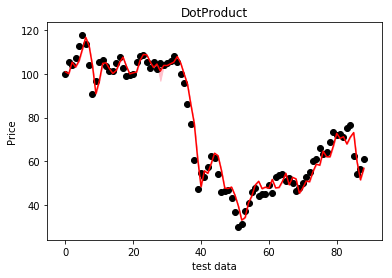

In [10]:
plt.figure()
plt.title('DotProduct')
#rng =  np.random.RandomState(0)
#y_train += rng.rand(x_train.shape[0])  # add noise
plt.fill_between(np.arange(len(x_test)), y_predict - 5000*y_std, y_predict + 5000*y_std, color='pink',
                 )
plt.plot(np.arange(len(x_test)), y_predict, color= 'red', label= 'o')
plt.scatter(np.arange(len(x_test)), y_test, color= 'black', label= 'Data')
plt.xlabel('test data')
plt.ylabel('Price')

In [22]:
mse=[]
for a,b in zip(y_predict,y_test):
    print(a,b)
    mse.append(np.square(y_predict-y_test))

print('>>> The model"s mse is %5f'%(np.mean(mse)))

rmse=np.sqrt(np.mean(mse))
print('>>> The model"s rmse is %5f'%(rmse))

r2=r2_score(y_test, y_predict)
print('>>> The model"s r2 is %5f'%(r2))

100.96807098388672 99.85
100.04317474365234 105.41
105.34442138671875 104.23
103.11553955078125 107.07
105.82337188720703 112.69
111.18175506591797 117.79
116.73681640625 113.67
112.80853271484375 104.09
103.67434692382812 90.73
90.93611145019531 96.75
96.67594909667969 105.27
104.79945373535156 106.28
105.07012176513672 103.41
102.33372497558594 101.17
100.19798278808594 101.19
101.52787017822266 105.1
105.2558364868164 107.64
107.67764282226562 102.52
103.48822021484375 98.85
99.98910522460938 99.37
100.48480224609375 99.74
100.83766174316406 105.26
106.10073852539062 108.16
108.86575317382812 108.76
108.74555969238281 105.43
105.57050323486328 102.63
102.90084075927734 105.48
104.49981689453125 102.1
101.27708435058594 104.83
103.88003540039062 104.04
103.81916809082031 104.87
104.61061096191406 105.71
105.41146850585938 108.37
107.94764709472656 105.23
104.95376586914062 100.05
100.014892578125 95.85
95.31792449951172 86.08
86.00261688232422 76.99
77.33570861816406 60.7
61.23457336